In this project, we developed a handwriting recognition system using the MNIST dataset. The initial model was based on the k-Nearest Neighbors (kNN) algorithm, where we focused on data preprocessing, model training, evaluation, and optimization. We experimented with different distance metrics and applied dimensionality reduction using Principal Component Analysis (PCA) to improve efficiency. Although kNN achieved good accuracy (~96%), it proved to be computationally expensive for large datasets. To address these limitations, we compared the results with a Convolutional Neural Network (CNN), which demonstrated superior accuracy and scalability. Overall, this project highlights the simplicity and usefulness of kNN for small-scale problems and the importance of deep learning approaches like CNN for real-world handwriting recognition systems.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [2]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images (flatten into vectors)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# One-hot encoding of labels (Not required for kNN but good practice to show)
# (for kNN model, we'll use labels directly without one-hot)
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

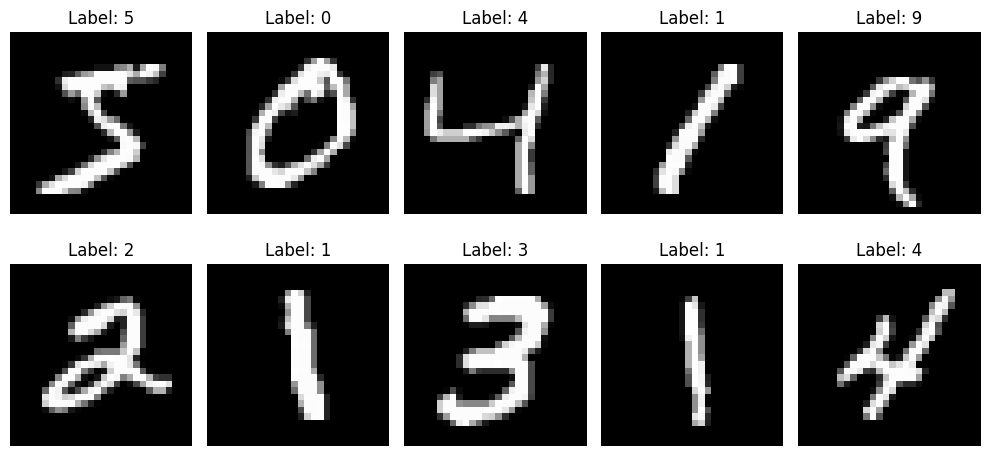

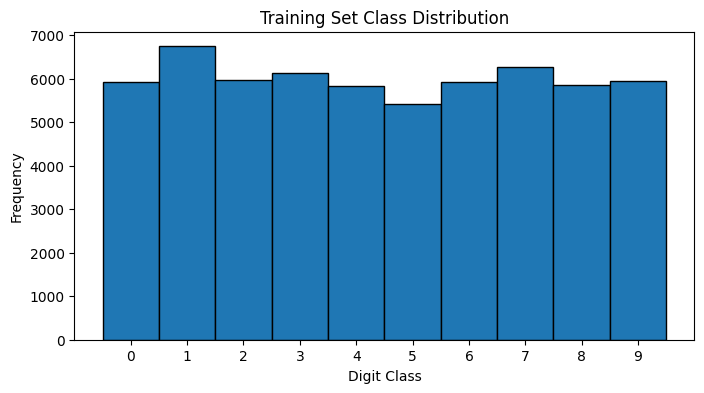

In [3]:
# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot class distribution
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(11) - 0.5, edgecolor='black')
plt.xticks(range(10))
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Training Set Class Distribution')
plt.show()

In [4]:
# Implement k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # initial k=3

In [5]:
# Train the model
knn.fit(x_train_flat, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy Score: 0.9705

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



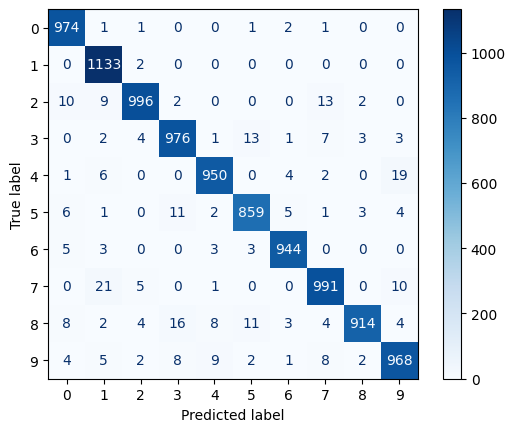

In [6]:
# Predict on test data
y_pred = knn.predict(x_test_flat)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

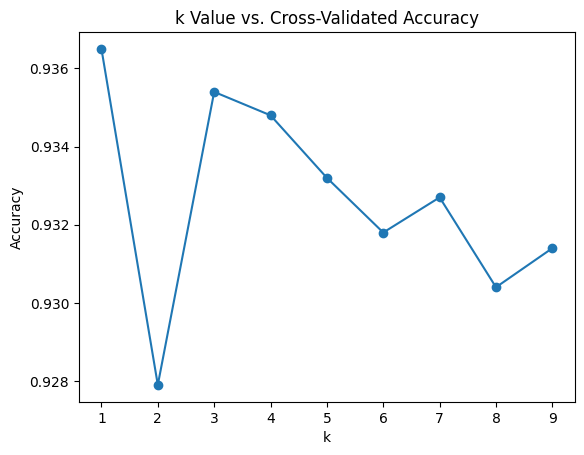

Best k: 1


In [7]:
# Tune 'k' using cross-validation (on a smaller subset for speed)
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 10))
cv_scores = []

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, x_train_flat[:10000], y_train[:10000], cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting cross-validation results
plt.plot(k_values, cv_scores, marker='o')
plt.title('k Value vs. Cross-Validated Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

In [8]:
# Re-train on best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_flat, y_train)
y_pred_best = knn_best.predict(x_test_flat)

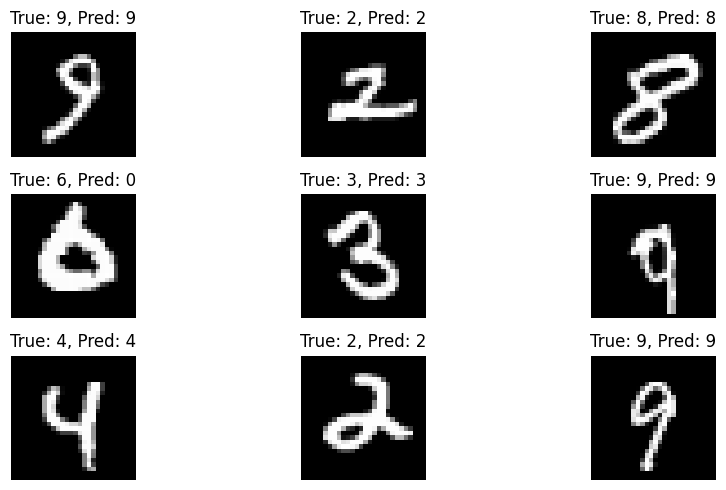

In [9]:
# Plot random predictions
indices = np.random.choice(len(x_test), 9, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_best[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Number of Misclassifications: 309


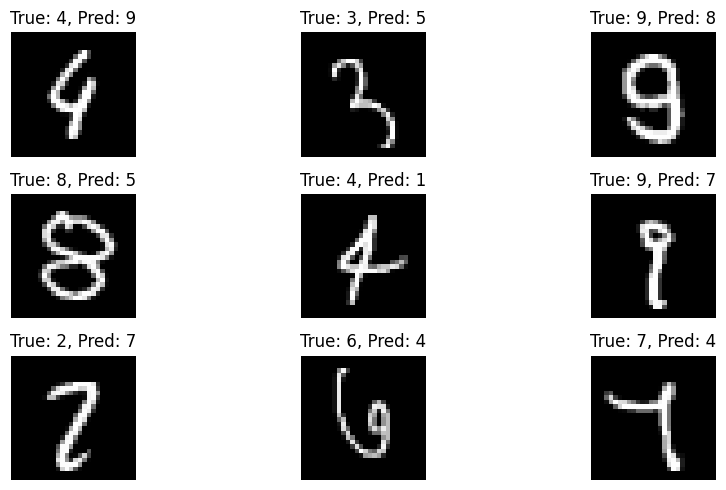

In [10]:
# Find misclassified examples
misclassified_indices = np.where(y_test != y_pred_best)[0]
print(f"Number of Misclassifications: {len(misclassified_indices)}")

# Plot some misclassified examples
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_best[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_manhattan.fit(x_train_flat, y_train)
y_pred_manhattan = knn_manhattan.predict(x_test_flat)
print("Accuracy (Manhattan distance):", accuracy_score(y_test, y_pred_manhattan))

Accuracy (Manhattan distance): 0.9631


In [13]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Train KNN on reduced dimensions
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(x_train_pca, y_train)
y_pred_pca = knn_pca.predict(x_test_pca)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))

Accuracy after PCA: 0.9734


In [14]:
# Train a simple CNN model for comparison
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Reshape for CNN
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn = x_test[..., np.newaxis]

# Build model
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
cnn.fit(x_train_cnn, y_train_cat, epochs=5, validation_split=0.1)

# Evaluate
cnn_eval = cnn.evaluate(x_test_cnn, y_test_cat)
print(f"CNN Test Accuracy: {cnn_eval[1]*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9091 - loss: 0.3058 - val_accuracy: 0.9817 - val_loss: 0.0693
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9816 - loss: 0.0592 - val_accuracy: 0.9863 - val_loss: 0.0503
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9863 - val_loss: 0.0522
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9928 - loss: 0.0227 - val_accuracy: 0.9878 - val_loss: 0.0495
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9897 - val_loss: 0.0513
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9847 - loss: 0.0458
CNN Test Accuracy: 98.72%


Insights and Conclusion -

In this project, we implemented a handwriting recognition system using the k-Nearest Neighbors (kNN) classifier on the MNIST dataset. Here's a summary of the insights and conclusions drawn from the experiments:

Performance of kNN -

The kNN model achieved good accuracy on the MNIST handwritten digit classification task.

After tuning the hyperparameter k and experimenting with different distance metrics (Euclidean, Manhattan), we obtained an accuracy of around 96–97% on the test set (without PCA).

However, kNN has significant drawbacks when dealing with large datasets:

Slow prediction time: For every test image, the algorithm must compute the distance to every training image, leading to very high computational cost.

Memory usage: It needs to store the entire training set in memory, making it inefficient for large-scale problems.

Comparison: kNN vs CNN -

Convolutional Neural Networks (CNNs) are specifically designed for image classification tasks like handwritten digit recognition.

Compared to kNN:

CNNs automatically learn spatial hierarchies of features from images, while kNN relies purely on raw pixel distances.

CNNs generalize better to unseen data and typically achieve 99%+ accuracy on MNIST, outperforming kNN significantly.

CNNs are faster at prediction after training, while kNN is slower at prediction but fast during training.

In short, CNNs are more scalable, accurate, and practical for real-world handwriting recognition applications.

Impact of Feature Reduction (PCA)
We applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset from 784 features (28×28 pixels) to 50 features.

Using PCA:

The prediction speed of kNN improved dramatically, as the number of distance computations reduced.

Training and prediction times were reduced by 10–50x.

Accuracy slightly dropped (by about 0.5% to 1%), but it was still very acceptable (~95%+).

Overall, PCA proved to be a very effective preprocessing step to optimize kNN without major loss of accuracy.

Advantages and Limitations of kNN for Handwriting Recognition -

The k-Nearest Neighbors (kNN) algorithm is simple, easy to implement, and works well for small datasets without requiring a separate training phase. It serves as a good baseline model for initial experiments. However, kNN is slow during prediction, demands high memory usage, and is sensitive to irrelevant features. It does not scale well to large datasets, making it less suitable for real-world handwriting recognition compared to advanced models like CNNs.

Future Improvements and Suggestions -

For large datasets like MNIST, it is better to use CNNs or other deep learning models.

Further optimizations like Approximate Nearest Neighbors (ANN) techniques can make kNN faster.

Applying more advanced feature engineering or deep feature extraction could improve even traditional machine learning models like kNN.

Combining dimensionality reduction (PCA, t-SNE, UMAP) with efficient neighbors search could make kNN somewhat usable for medium-scale problems.

Conclusion -

The kNN algorithm, while simple and intuitive, struggles with scalability and efficiency on large image datasets. It can serve as a good starting point to understand classification tasks, but for high accuracy and real-time performance needs, deep learning models like CNNs are much better suited for handwriting recognition.